In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
import pandas as pd

df = pd.read_csv('Desktop/Simulation/data/uber-raw-data-apr14.csv')

df['Date/Time'] = pd.to_datetime(df['Date/Time'])  # convert string into timestamps
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


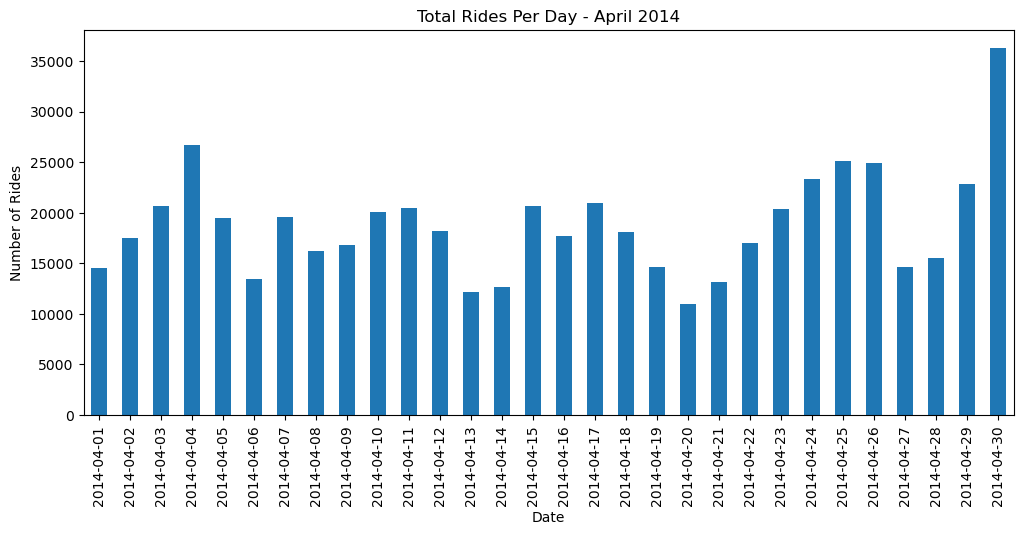

In [65]:
#TOTAL RIDES PER DAY

df['date'] = df['Date/Time'].dt.date

daily_rides = df.groupby('date').size().reset_index(name='total_rides')

# Plot
daily_rides.plot(x='date', y='total_rides', kind='bar', figsize=(12, 5), legend=False)
plt.title('Total Rides Per Day - April 2014')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()

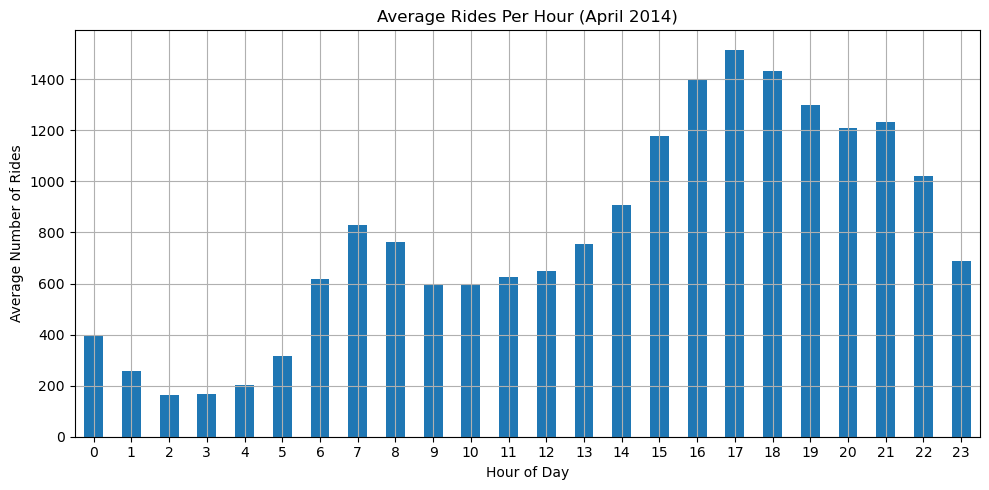

In [45]:
#HOURLY RIDE DISTRIBUTION - DAILY AVERAGE 

df['hour'] = df['Date/Time'].dt.hour

hourly_avg = df.groupby('hour').size() / df['date'].nunique()

hourly_avg.plot(kind='bar', figsize=(10, 5))
plt.title('Average Rides Per Hour (April 2014)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rides')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

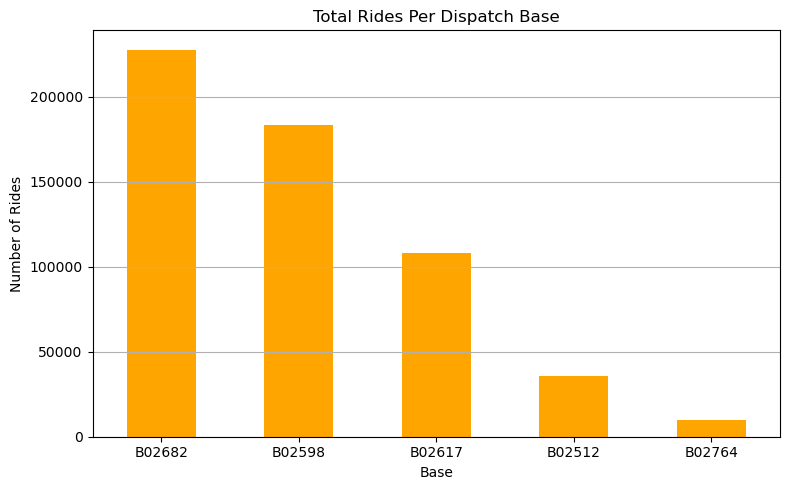

In [47]:
#RIDES PER BASE 

base_counts = df['Base'].value_counts()

base_counts.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Total Rides Per Dispatch Base')
plt.xlabel('Base')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

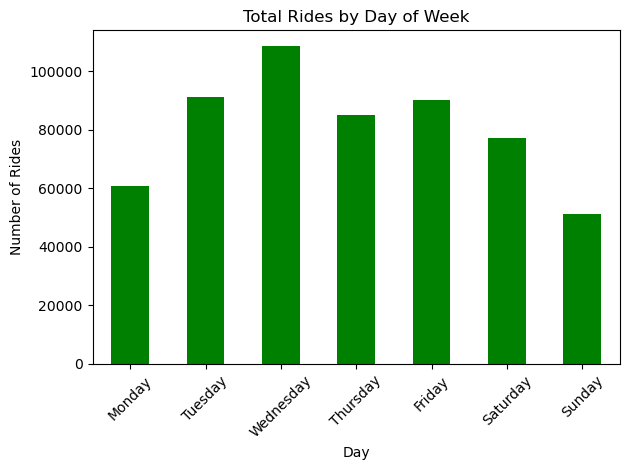

In [49]:
#RIDES PER DAY OF THE WEEK 

df['day_of_week'] = df['Date/Time'].dt.day_name()

dow_summary = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

dow_summary.plot(kind='bar', color='green')
plt.title('Total Rides by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
# Combine all into one Excel file
with pd.ExcelWriter('april_kpi_report.xlsx', engine='openpyxl') as writer:
    daily_rides.to_excel(writer, sheet_name='Daily Rides', index=False)
    hourly_avg.to_frame(name='avg_rides').to_excel(writer, sheet_name='Hourly Avg')
    base_counts.to_frame(name='total_rides').to_excel(writer, sheet_name='Rides per Base')
    dow_summary.to_frame(name='total_rides').to_excel(writer, sheet_name='Rides per Weekday')


In [ ]:
#what I could do to make it better for sure 
#'Simulate marketing spend vs. rider acquisition (random example), 
#Add % change from previous day, 
#Export charts to .png and include in slide deck'

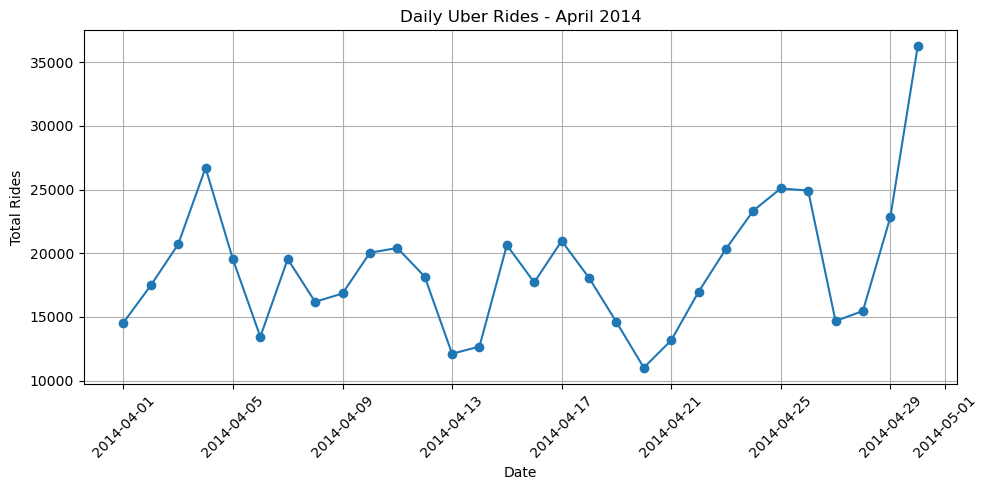

In [69]:
import matplotlib.pyplot as plt

# Plot total rides and save
plt.figure(figsize=(10, 5))
plt.plot(daily_rides['date'], daily_rides['total_rides'], marker='o')
plt.title('Daily Uber Rides - April 2014')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save to file
plt.savefig('total_rides_april.png', dpi=300)
plt.show()
